In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.io import loadmat
%matplotlib inline

In [15]:
# Find Closest Centroids
df = loadmat('ex7data2.mat')
X = df['X']
K = 3 
initial_centroids = np.array([[3,3],[6,2],[8,5]])
# print(X.shape,initial_centroids.shape)
# d = X - initial_centroids[0,:]
# d ** 2

In [16]:
def findClosestCentroids(X, centroids):
    # No of Centroids
    K = centroids.shape[0]
    # No of examples
    m = X.shape[0]
    # Store dist of mth eg wrt each centroid k
    dist = np.zeros((m,K))
    for i in range(K):
        # D of ith centroid wrt each eg
        D = X - initial_centroids[i,:]
        # Calculate Sq. Dist and sum across axis 1
        # Now dist[:,i] contains dist of each eg wrt each ith centroid
        dist[:,i]  = np.sum(D ** 2,1)
    # idx[i] contains centroid no. assigned to ith eg.
    idx = np.argmin(dist,1)
    return idx

In [17]:
# Check function
idx = findClosestCentroids(X,initial_centroids)
print(idx[:3])

[0 2 1]


In [18]:
def computeCentroids(X, idx, K):
    m = X.shape[0]
    n = X.shape[1]
    # New K centroids
    centroids = np.zeros((K, n))
    for i in range(K):
        # Find index of records containing ith centroid
        index = idx == i
        # Find mean of all those indexes and calculate new centroid
        centroids[i,:] = np.mean(X[index,:],0)
    return centroids

In [19]:
# Check Centroids
computeCentroids(X,idx,K)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [20]:
def kMeansInitCentroids(X,K):
    centroids = np.zeros((K,X.shape[1]))
    idx = np.random.randint(0,X.shape[0],K)
    for i in range(K):
        centroids[i,:] = X[idx[i],:]
    return centroids

In [21]:
# Randomly initialize Centroids
K = 3
max_iters = 100
initial_centroids = kMeansInitCentroids(X,K)

In [22]:
def runkMeans(X,initial_centroids,max_iters):
    m = X.shape[0]
    n = X.shape[1]
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros((m,1))
    for i in range(max_iters):
        idx = findClosestCentroids(X,centroids)
        centroids = computeCentroids(X, idx, K)
    return idx

In [23]:
# Run Kmeans
max_iters = 100
idx = runkMeans(X, initial_centroids, max_iters)

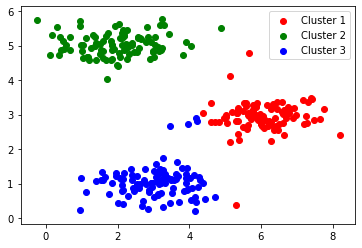

In [24]:
# Visualize 3 Clusters
k1 = X[idx==0,:]
k2 = X[idx==1,:]
k3 = X[idx==2,:]
plt.scatter(k1[:,0],k1[:,1],c='r',label="Cluster 1")
plt.scatter(k2[:,0],k2[:,1],c='g',label="Cluster 2")
plt.scatter(k3[:,0],k3[:,1],c='b',label="Cluster 3")
plt.legend()

Text(0.5, 1.0, 'Original Image')

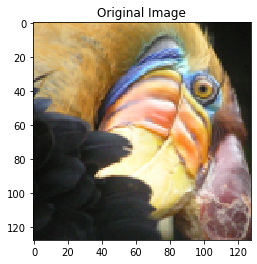

In [46]:
df = loadmat('bird_small.mat')
A = df['A']
# Divide by 255
A = A/255
X = np.reshape(A, (A.shape[0] * A.shape[1],A.shape[2]))
# Represent the image in K colors
K = 16
max_iters = 100
initial_centroids = kMeansInitCentroids(X,K)
# idx contains centroid no. for ith record 
idx = runkMeans(X, initial_centroids,K)
# centroids contain K centroids which will be used for replacing
centroids = computeCentroids(X,idx,K)
# Make the new compressed image by replacing all records with K eg using idx for each record
X_compressed = centroids[idx,:]
plt.imshow(A)
plt.title("Original Image")

Text(0.5, 1.0, 'Compressed Image K=64')

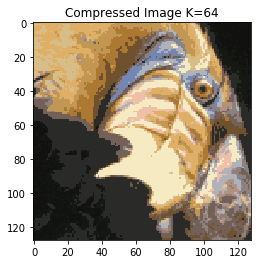

In [47]:
X_compressed = np.reshape(X_compressed, (A.shape[0],A.shape[1],A.shape[2]))
plt.imshow(X_compressed)
plt.title("Compressed Image K=64")